<a href="https://colab.research.google.com/github/10100111/Display-of-HW1/blob/main/89_Ultra_Lite_Optimizers_lesson_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание Ultra Lite

Макс 10 баллов

Часть 1

1) Постройте график функции x**2 для x от -5 до 5;

2) Постройте график производной данной функции;

3) Используя алгоритм градиентного спуска (stochastic gradient descent) найдите минимум данной функции, начав из точки x=-5. Продемонстрируйте работу алгоритма на графике.

Часть 2

Пользуясь условием из первой части, добавьте к алгоритму градиентного спуска алгоритм оптимизации Adagrad. Продемонстрируйте работу алгоритма на графике.

In [ ]:
import numpy as np

from matplotlib import pyplot as plt

## SGD и изменение learning rate

*Разбор данного раздела:* https://youtu.be/4moZyfpauQY?t=2991

In [ ]:
# given_data = np.random.normal(loc = 0, scale = 1, size = 5000) 
# получение 5000 точек из нормального распределения со средним = 0 и стандартным отклонением = 1

In [ ]:
x = np.random.normal(loc = 0, scale = 1, size = 50)
y = x**2

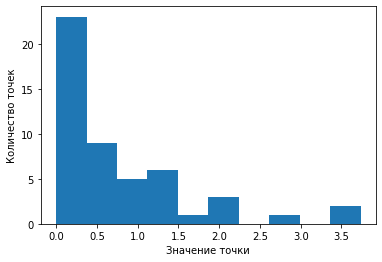

In [ ]:
plt.hist(y, bins = 10) # изображение полученных точек
plt.xlabel("Значение точки")
plt.ylabel("Количество точек")
plt.show()

In [ ]:
def RMSE(datapoint, values): # поиск среднеквадратического отклонения
    difference = values - datapoint # расстояние между точками
    difference = difference**2 # возведение в квадрат
    return difference.mean() ** 0.5 # поиск среднего и взятие корня

In [ ]:
x_values = np.linspace(-5, 5, 1000) # задаём значения, при которых считается ошибка
y_values = np.array([RMSE(x, y) for x in x_values]) # ищем значение ошибки в этих точках

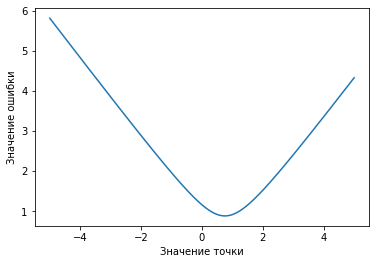

In [ ]:
plt.plot(x_values, y_values) # изображаем кривую ошибки
plt.xlabel("Значение точки")
plt.ylabel("Значение ошибки")
plt.show()

In [ ]:
def derivative(func, value, step = 1e-6): # функция для поиска производной в точке функции
    return (func(value + step) - func(value - step)) / (2 * step)

In [ ]:
initial_estimator = -5 # берём случайную точку для начала поиска минимума 
current_estimator = initial_estimator
estim_log = [current_estimator] # создаём список, в котором будут храниться значения 
values_log = [RMSE(current_estimator, y)] # создаём список со значениями ошибок

RMSE_point = lambda x: RMSE(x, y) # функция для подсчёта RMSE на точке

learning_steps = 5 # за 5 шагов
learning_rate = 0.9 

for i in range(learning_steps):
    current_estimator -= derivative(RMSE_point, current_estimator) * learning_rate # шаг градиентного спуска
    estim_log.append(current_estimator) # добавляем информацию в логи
    values_log.append(RMSE(current_estimator, y))

In [ ]:
def draw_trajectory(x_values, y_values, estim_log, values_log):
    plt.plot(x_values, y_values) # изображаем кривую ошибки
    plt.plot(estim_log, values_log, marker='o') # изхображаем значения, через которые прошёл наш оптимизатор
    plt.legend(["Функция ошибки", "Путь оптимизатора"])
    plt.xlabel("Значение точки")
    plt.ylabel("Значение ошибки")
    plt.show()

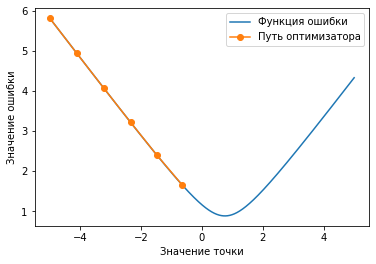

In [ ]:
draw_trajectory(x_values, y_values, estim_log, values_log)

In [ ]:
initial_estimator = -5 # берём случайную точку для начала поиска минимума 
current_estimator = initial_estimator
estim_log = [current_estimator] # создаём список, в котором будут храниться значения 
values_log = [RMSE(current_estimator, y)] # создаём список со значениями ошибок

RMSE_point = lambda x: RMSE(x, y) # функция для подсчёта RMSE на точке

learning_steps = 10 # за 10 шагов
learning_rate = 0.9

for i in range(learning_steps):
    current_estimator -= derivative(RMSE_point, current_estimator) * learning_rate # шаг градиентного спуска
    estim_log.append(current_estimator) # добавляем информацию в логи
    values_log.append(RMSE(current_estimator, y))

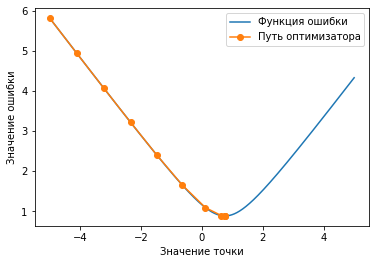

In [ ]:
draw_trajectory(x_values, y_values, estim_log, values_log)

In [ ]:
# Уменьшаем learning_rate пропорционально шагам
current_estimator = initial_estimator
estim_log = [current_estimator]
values_log = [RMSE(current_estimator, y)]

learning_steps = 20 # за 20 шагов
learning_rate = 2   # огромный learning_rate, такое не делать!!!!

for i in range(learning_steps):
    current_learning_rate = learning_rate / (1 + i) # изменяем learning rate в зависимости от номера шага
    current_estimator -= derivative(RMSE_point, current_estimator) * current_learning_rate # шаг градиентного спуска
    estim_log.append(current_estimator) # добавляем информацию в логи
    values_log.append(RMSE(current_estimator, y))

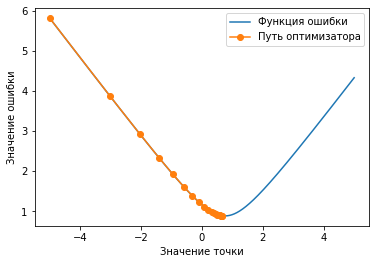

In [ ]:
draw_trajectory(x_values, y_values, estim_log, values_log)

## Adagrad и RMSprop

*Разбор данного раздела:* https://youtu.be/4moZyfpauQY?t=4023

In [ ]:
class Adagrad:
    def __init__(self, eps = 1e-06):
        self.cache = 0
        self.eps = eps

    def apply_grad(self, x, dx, learning_rate):
        self.cache = self.cache + dx ** 2 # добавление новой информации в кэш
        adapted_lr = learning_rate / (self.cache + self.eps) ** 0.5 # уменьшение шага в разных направлениях в зависимости от кэша
        return x - adapted_lr * dx 

In [ ]:
adagrad = Adagrad() # создаём оптимизатор Адаград

current_estimator = initial_estimator
estim_log = [current_estimator]
values_log = [RMSE(current_estimator, y)]

learning_steps = 20
learning_rate = 2 # огромный learning_rate, такое не делать!!!!

for i in range(learning_steps):
    derivative_val = derivative(RMSE_point, current_estimator)
    current_estimator = adagrad.apply_grad(current_estimator, # делаем шаг оптимизатора Адаград 
                                           derivative_val,
                                           learning_rate) 
    estim_log.append(current_estimator)
    values_log.append(RMSE(current_estimator, y))

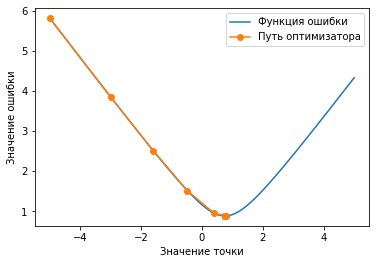

In [ ]:
draw_trajectory(x_values, y_values, estim_log, values_log)

In [ ]:
x_values = np.linspace(-5, 5, 100) # задаём значения, при которых считается ошибка
y_values = np.array([RMSE(x, y) for x in x_values]) # ищем значение ошибки в этих точках

In [ ]:
initial_estimator = -5 
current_estimator = initial_estimator
estim_log = [current_estimator]
values_log = [RMSE(current_estimator, y)]

RMSE_point = lambda x: RMSE(x, y)

learning_steps = 50
learning_rate = 0.9

for i in range(learning_steps):
    current_estimator -= derivative(RMSE_point, current_estimator) * learning_rate
    estim_log.append(current_estimator)
    values_log.append(RMSE(current_estimator, y))

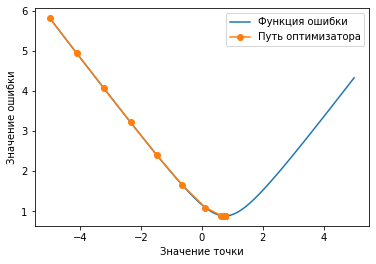

In [ ]:
draw_trajectory(x_values, y_values, estim_log, values_log)

In [ ]:
sgd_last = round(values_log[-1], 2)

In [ ]:
adagrad = Adagrad()

current_estimator = initial_estimator
estim_log = [current_estimator]
values_log = [RMSE(current_estimator, y)]

learning_steps = 50
learning_rate = 0.9

for i in range(learning_steps):
    derivative_val = derivative(RMSE_point, current_estimator)
    current_estimator = adagrad.apply_grad(current_estimator, 
                                           derivative_val,
                                           learning_rate) 
    estim_log.append(current_estimator)
    values_log.append(RMSE(current_estimator, y))

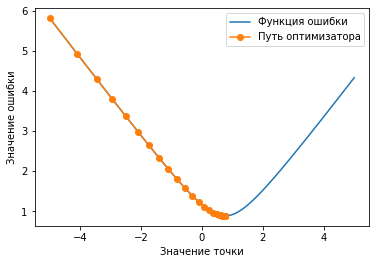

In [ ]:
draw_trajectory(x_values, y_values, estim_log, values_log)

In [ ]:
ada_last = round(values_log[-1], 2)